### Initial set-up
Getting up to speed with the current version

In [2]:
!ls ../ | grep script

scripts
testing_scripts


In [ ]:
# !dvc fetch ../../data/default_env.pickle.dvc
# !dvc checkout ../../data/default_env.pickle.dvc

In [6]:
!dvc repro -s gen_env

Stage 'gen_env' is cached - skipping run, checking out outputs        core>
Updating lock file 'dvc.lock'

To track the changes with git, run:

	git add dvc.lock
Use `dvc push` to send your updates to remote storage.


In [8]:
!dvc dag > dvc_dag.out

### Check out gen_env

In [1]:
import sys
sys.path.append('../src')

In [2]:
import yaml
import math
import pickle
import numpy as np
from pickle_wrapper import unpickle, pickle_it
import matplotlib.pyplot as plt



from pickle_wrapper import unpickle, pickle_it
from mcmc_norm_learning.algorithm_1_v4 import create_data
from mcmc_norm_learning.rules_4 import get_prob, get_log_prob
from mcmc_norm_learning.environment import position,plot_env
from mcmc_norm_learning.robot_task_new import task, robot, plot_task

In [3]:
with open("../params.yaml", 'r') as fd:
    params = yaml.safe_load(fd)

In [4]:
params['true_norm']['exp']

['Norms',
 ['Obl',
  ['Moved',
   ['Colour', 'r'],
   ['Shape', 'any'],
   ['Zone', '1'],
   ['Next-Move', ['Colour', 'any'], ['Shape', 'any']]],
  ['Zone', '2']],
 ['Per',
  ['Action', 'putdown'],
  ['Colour', 'any'],
  ['Shape', 'square'],
  ['PerZone', '3']]]

In [5]:
##Get default env
env = unpickle('../data/env.pickle')

In [6]:
##Get default task
true_norm_exp = params['true_norm']['exp']
num_observations = params['num_observations']
obs_data_set = params['obs_data_set']

colour_specific = params['colour_specific']
shape_specific = params['shape_specific']
target_area_parts = params['target_area'].replace(' ','').split(';')
target_area_part0 = position(*map(float, target_area_parts[0].split(',')))
target_area_part1 = position(*map(float, target_area_parts[1].split(',')))
target_area = (target_area_part0, target_area_part1)
print(target_area_part0.coordinates())
print(target_area_part1.coordinates())
the_task = task(colour_specific, shape_specific,target_area)

(-0.8, 0.7)
(0.25, 0.99)


In [7]:
params['target_area']

'-0.8, 0.7 ; 0.25, 0.99'

In [8]:
list(map(lambda x: x.coordinates() ,the_task.target_area))

[(-0.8, 0.7), (0.25, 0.99)]

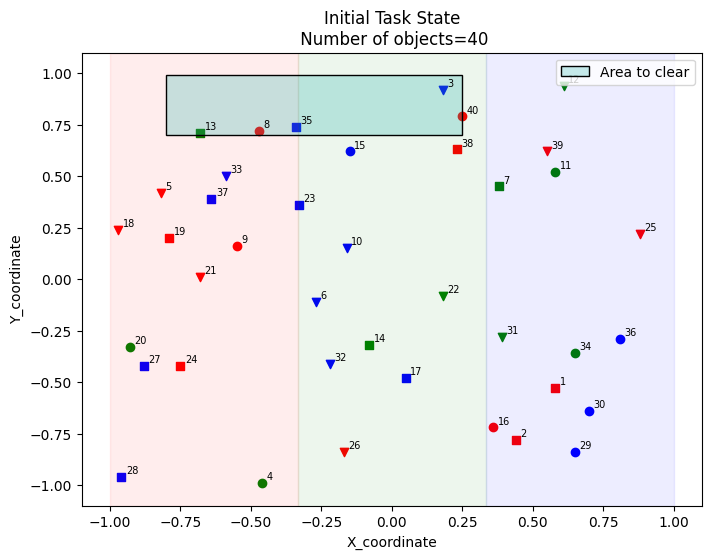

In [46]:
fig,ax=plt.subplots(figsize=(8,6),dpi=100);
plot_task(env,ax,"Initial Task State",the_task,True)

### Setup ROBOT

In [25]:
true_norm_exp

['Norms',
 ['Obl',
  ['Moved',
   ['Colour', 'r'],
   ['Shape', 'any'],
   ['Zone', '1'],
   ['Next-Move', ['Colour', 'any'], ['Shape', 'any']]],
  ['Zone', '2']],
 ['Per',
  ['Action', 'putdown'],
  ['Colour', 'any'],
  ['Shape', 'square'],
  ['PerZone', '3']]]

In [11]:
rob = robot(the_task,env)

In [16]:
rob.all_actionable()

[3, 8, 13, 35, 40]

In [17]:
true_norm_prior = get_prob("NORMS",true_norm_exp) 
true_norm_log_prior = get_log_prob("NORMS",true_norm_exp) 

In [18]:
true_norm_prior

8.930612711476907e-07

In [19]:
true_norm_log_prior

-13.928610645716274

In [20]:
### Generate action profile
observations = create_data(true_norm_exp,env,name=None,task=the_task,random_task=False,
                               num_actionable=np.nan,num_repeat=num_observations,verbose=False)

Repetition of Task: 100%|██████████| 50/50 [00:00<00:00, 427.39it/s]


In [22]:
#num_observations is #times task to be performed randomly
len(observations)

50

In [37]:
len(observations[0])

5

In [30]:
([obs for obs in observations\
     if (observations[0][0] == (('pickup', 8), ('putdown', 8, '1'))) and\
    (observations[2][0] == (('pickup', 40), ('putdown', 40, '1')))])

[]

In [43]:
counter=0
for obs in observations:
    if any([action == (('pickup', 8), ('putdown', 8, '1')) for action in obs]):
        counter+=1
print (counter)

18


In [24]:
(1/3)**5

0.004115226337448558

In [23]:
observations[0]

((('pickup', 8), ('putdown', 8, '2')),
 (('pickup', 13), ('putdown', 13, '2')),
 (('pickup', 3), ('putdown', 3, '2')),
 (('pickup', 35), ('putdown', 35, '2')),
 (('pickup', 40), ('putdown', 40, '3')))

In [48]:
observations = create_data(true_norm_exp,env,name=None,task=the_task,random_task=False,
                               num_actionable=np.nan,num_repeat=num_observations,verbose=False)
pickle_it(observations, '../data/observations_ad_0.0.pickle')

Repetition of Task: 100%|██████████| 50/50 [00:00<00:00, 549.93it/s]


In [49]:
rob = robot(the_task,env)